In [27]:
from sympy import symbols, init_printing
init_printing()
from celmech.hamiltonian import HamiltonianPoincare
from celmech.transformations import poincare_vars_from_sim

In [28]:
import rebound
import numpy as np

def make_sim(j, k):
    mass = 1.e-5
    e0 = 1.e-4 # initial eccentricity of planets
    
    sim = rebound.Simulation()
    sim.G = 4*np.pi**2
    sim.add(m=1.)
    sim.add(m=mass, e=e0, P=1.)
    sim.add(m=mass, e=e0, P=j/float(j-k))
    sim.add(m=mass, e=e0, P=5.)
    sim.move_to_com()
    return sim

j=5
k=1
sim = make_sim(j,k)

In [29]:
from itertools import combinations
pairs = combinations(range(1,sim.N), 2)
list(pairs)

In [30]:
Hsim = HamiltonianPoincare()

In [31]:
Hsim.initialize_from_sim(sim)

1.35579460592e-08
[6.2818085687622641e-05, 7.413990091737838e-07, 3.1415822323483563e-13, -0.0, 6.769700708808435e-05, 1.2370316755692315e-06, 3.3841725116777699e-13, -0.0, 0.00010744095743252336, 1.5588502717598586e-06, 5.3720479582611278e-13, -0.0]
3.93255381948e-11
[6.281804636208444e-05, 7.413990091737838e-07, 3.1415822323483563e-13, -0.0, 6.769700708808435e-05, 1.2370316755692315e-06, 3.3841725116777699e-13, -0.0, 0.00010744099675806156, 1.5588502717598586e-06, 5.3720479582611278e-13, -0.0]
7.80055113031e-11
[6.281804636208444e-05, 7.413990091737838e-07, 3.1415822323483563e-13, -0.0, 6.7696929082573053e-05, 1.2370316755692315e-06, 3.3841725116777699e-13, -0.0, 0.00010744107476357286, 1.5588502717598586e-06, 5.3720479582611278e-13, -0.0]


In [32]:
Hsim.integrator.y

array([  6.28180464e-05,   7.41399009e-07,   3.14158223e-13,
        -0.00000000e+00,   6.76969291e-05,   1.23703168e-06,
         3.38417251e-13,  -0.00000000e+00,   1.07441075e-04,
         1.55885027e-06,   5.37204796e-13,  -0.00000000e+00])

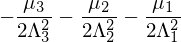

In [33]:
Hsim.H

In [34]:
Hsim.add_all_resonance_subterms(1,2,j,k)

In [35]:
Hsim.Lambda

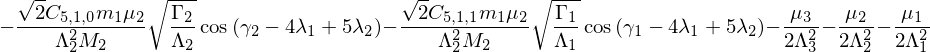

In [36]:
Hsim.H

In [37]:
Norbits = 300
Nout = 1000
tmax = Norbits*sim.particles[1].P
times = np.linspace(0, tmax, Nout)

Nsol = np.zeros((4*(sim.N-1), Nout))
symsol = np.zeros((4*(sim.N-1), Nout))
for i, time in enumerate(times):
    sim.integrate(time)
    Hsim.integrate(time)
    Nsol[:,i] = poincare_vars_from_sim(sim)
    symsol[:,i] = list(Hsim.integrator.y)

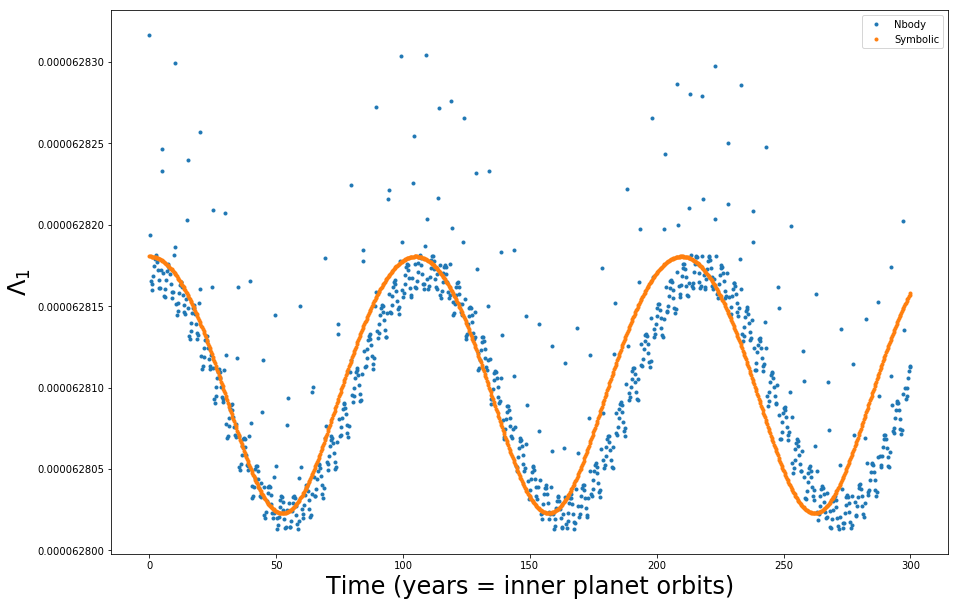

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.set_xlabel("Time (years = inner planet orbits)", fontsize=24)
ax.set_ylabel(r"$\Lambda_1$", fontsize=24)

ax.plot(times, Nsol[0,:], '.', label='Nbody')
ax.plot(times, symsol[0,:], '.', label='Symbolic')

ax.legend()

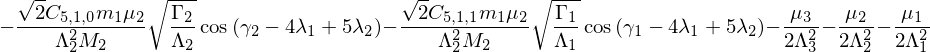

In [39]:
Hsim.H